In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv("modified_table.csv")

In [80]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,health,absences,G1,G2,G3,non_study_time,grade,Grade_Numeric,Alcohol_Consumption
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,6,5,6,6,4,E,4,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,4,5,5,6,3,E,4,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,10,7,8,10,2,D,5,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,5,2,15,14,15,2,B,7,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,5,4,6,10,10,2,D,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,11,9,9,9,4,D,5,4
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,2,3,14,16,16,4,B,7,4
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,10,8,7,4,D,5,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,5,0,11,12,10,2,C,6,4


In [81]:
df.rename(columns={'Grade_Numeric': 'GPA'}, inplace=True)

In [82]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,health,absences,G1,G2,G3,non_study_time,grade,GPA,Alcohol_Consumption
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,6,5,6,6,4,E,4,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,4,5,5,6,3,E,4,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,10,7,8,10,2,D,5,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,5,2,15,14,15,2,B,7,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,5,4,6,10,10,2,D,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,11,9,9,9,4,D,5,4
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,2,3,14,16,16,4,B,7,4
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,10,8,7,4,D,5,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,5,0,11,12,10,2,C,6,4


Till now we have made the data consise by merging some columns and adding some relevant columns 
now we will study that which factors affect the gpa of a student

by performing EDA on the new modified table

In [83]:
pd.crosstab(df['GPA'], df['school'], normalize='columns')*100


school,GP,MS
GPA,,
2,3.151862,0.000000
4,10.601719,15.217391
5,24.641834,26.086957
6,28.653295,32.608696
7,23.782235,21.739130
8,8.309456,2.173913
10,0.859599,2.173913


In [84]:
df.groupby('school')['GPA'].mean()


school
GP    5.853868
MS    5.782609
Name: GPA, dtype: float64

In [85]:
pd.crosstab(df['GPA'], df['sex'], normalize='columns')*100

sex,F,M
GPA,,
2,2.403846,3.208556
4,14.903846,6.951872
5,25.961538,23.529412
6,28.846154,29.411765
7,20.673077,26.737968
8,6.730769,8.556150
10,0.480769,1.604278


In [86]:
df.groupby('sex')['GPA'].mean()

sex
F    5.706731
M    6.000000
Name: GPA, dtype: float64

In [87]:
pd.crosstab(df['GPA'], df['age'], normalize='columns')*100

age,15,16,17,18,19,20,21,22
GPA,,,,,,,,
2,2.439024,2.884615,2.040816,3.658537,4.166667,0.000000,0.0,0.0
4,8.536585,6.730769,14.285714,14.634146,16.666667,0.000000,0.0,0.0
5,21.951220,26.923077,19.387755,26.829268,33.333333,33.333333,100.0,100.0
6,29.268293,25.961538,36.734694,26.829268,25.000000,0.000000,0.0,0.0
7,24.390244,28.846154,22.448980,18.292683,20.833333,33.333333,0.0,0.0
8,10.975610,7.692308,5.102041,8.536585,0.000000,33.333333,0.0,0.0
10,2.439024,0.961538,0.000000,1.219512,0.000000,0.000000,0.0,0.0


In [88]:
df.groupby('age')['GPA'].mean()

age
15    6.073171
16    5.961538
17    5.765306
18    5.695122
19    5.375000
20    6.666667
21    5.000000
22    5.000000
Name: GPA, dtype: float64

In [89]:
pd.crosstab(df['GPA'], df['address'], normalize='columns')*100

address,R,U
GPA,,
2,3.409091,2.605863
4,15.909091,9.771987
5,28.409091,23.778502
6,29.545455,28.990228
7,13.636364,26.384365
8,7.954545,7.491857
10,1.136364,0.977199


In [90]:
df.groupby('address')['GPA'].mean()

address
R    5.602273
U    5.915309
Name: GPA, dtype: float64

In [91]:
pd.crosstab(df['GPA'], df['famsize'], normalize='columns')*100

famsize,GT3,LE3
GPA,,
2,3.202847,1.754386
4,12.811388,7.017544
5,23.843416,27.192982
6,29.181495,28.947368
7,22.775801,25.438596
8,7.829181,7.017544
10,0.355872,2.631579


In [92]:
df.groupby('famsize')['GPA'].mean()

famsize
GT3    5.775801
LE3    6.017544
Name: GPA, dtype: float64

In [93]:
pd.crosstab(df['GPA'], df['Pstatus'], normalize='columns')*100

Pstatus,A,T
GPA,,
2,2.439024,2.824859
4,7.317073,11.581921
5,24.390244,24.858757
6,31.707317,28.813559
7,21.951220,23.728814
8,9.756098,7.344633
10,2.439024,0.847458


In [94]:
df.groupby('Pstatus')['GPA'].mean()

Pstatus
A    6.024390
T    5.824859
Name: GPA, dtype: float64

In [95]:
pd.crosstab(df['GPA'], df['Medu'], normalize='columns')*100

Medu,0,1,2,3,4
GPA,,,,,
2,0.000000,3.389831,2.912621,5.050505,0.763359
4,0.000000,16.949153,12.621359,11.111111,7.633588
5,33.333333,35.593220,24.271845,26.262626,19.083969
6,0.000000,27.118644,34.951456,27.272727,27.480916
7,66.666667,15.254237,20.388350,21.212121,30.534351
8,0.000000,1.694915,4.854369,9.090909,11.450382
10,0.000000,0.000000,0.000000,0.000000,3.053435


In [96]:
df['GPA'][df['Medu']==0].mean()

np.float64(6.333333333333333)

In [97]:
df['GPA'][df['Medu']==1].mean()

np.float64(5.3559322033898304)

In [98]:
df['GPA'][df['Medu']==2].mean()

np.float64(5.689320388349515)

In [99]:
df['GPA'][df['Medu']==3].mean()

np.float64(5.707070707070707)

In [100]:
df['GPA'][df['Medu']==4].mean()

np.float64(6.282442748091603)

In [101]:
pd.crosstab(df['GPA'], df['Fedu'], normalize='columns')*100

Fedu,0,1,2,3,4
GPA,,,,,
2,0.0,4.878049,1.739130,3.0,2.083333
4,0.0,13.414634,14.782609,6.0,10.416667
5,0.0,39.024390,17.391304,31.0,15.625000
6,50.0,21.951220,33.913043,32.0,26.041667
7,50.0,15.853659,26.086957,18.0,32.291667
8,0.0,4.878049,5.217391,9.0,11.458333
10,0.0,0.000000,0.869565,1.0,2.083333


In [102]:
df['GPA'][df['Fedu']==0].mean()

np.float64(6.5)

In [103]:
df['GPA'][df['Fedu']==1].mean()

np.float64(5.402439024390244)

In [104]:
df['GPA'][df['Fedu']==2].mean()

np.float64(5.860869565217391)

In [105]:
df['GPA'][df['Fedu']==3].mean()

np.float64(5.85)

In [106]:
df['GPA'][df['Fedu']==4].mean()

np.float64(6.1875)

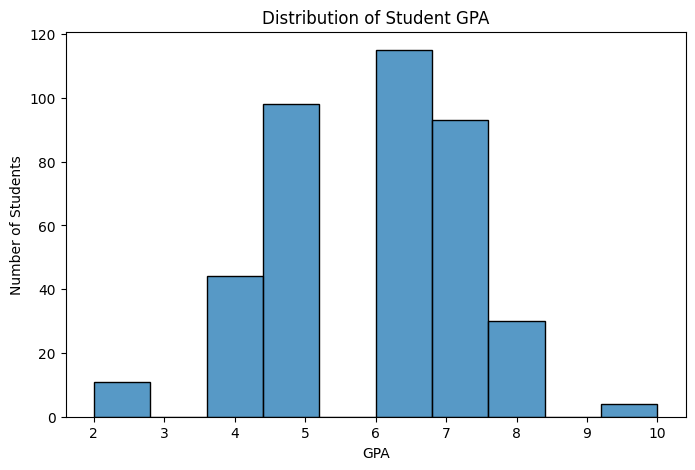

In [107]:
plt.figure(figsize=(8,5))
sns.histplot(df['GPA'], bins=10)
# sns.kdeplot(df['GPA'])
plt.title('Distribution of Student GPA')
plt.xlabel('GPA')
plt.ylabel('Number of Students')   
plt.show()

In [108]:
df['GPA'].skew()

np.float64(-0.23985097881652084)

In [109]:
df['Parental_Education'] = np.round((df['Medu']+df['Fedu'])/2).astype(int)

In [110]:
df = df.drop(columns=['Medu','Fedu'])

In [111]:
df

,school,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,...,health,absences,G1,G2,G3,non_study_time,grade,GPA,Alcohol_Consumption,Parental_Education
0,GP,F,18,U,GT3,A,at_home,teacher,course,mother,...,3,6,5,6,6,4,E,4,1,4
1,GP,F,17,U,GT3,T,at_home,other,course,father,...,3,4,5,5,6,3,E,4,1,1
2,GP,F,15,U,LE3,T,at_home,other,other,mother,...,3,10,7,8,10,2,D,5,2,1
3,GP,F,15,U,GT3,T,health,services,home,mother,...,5,2,15,14,15,2,B,7,1,3
4,GP,F,16,U,GT3,T,other,other,home,father,...,5,4,6,10,10,2,D,5,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,services,services,course,other,...,4,11,9,9,9,4,D,5,4,2
391,MS,M,17,U,LE3,T,services,services,course,mother,...,2,3,14,16,16,4,B,7,4,2
392,MS,M,21,R,GT3,T,other,other,course,other,...,3,3,10,8,7,4,D,5,3,1
393,MS,M,18,R,LE3,T,services,other,course,mother,...,5,0,11,12,10,2,C,6,4,2


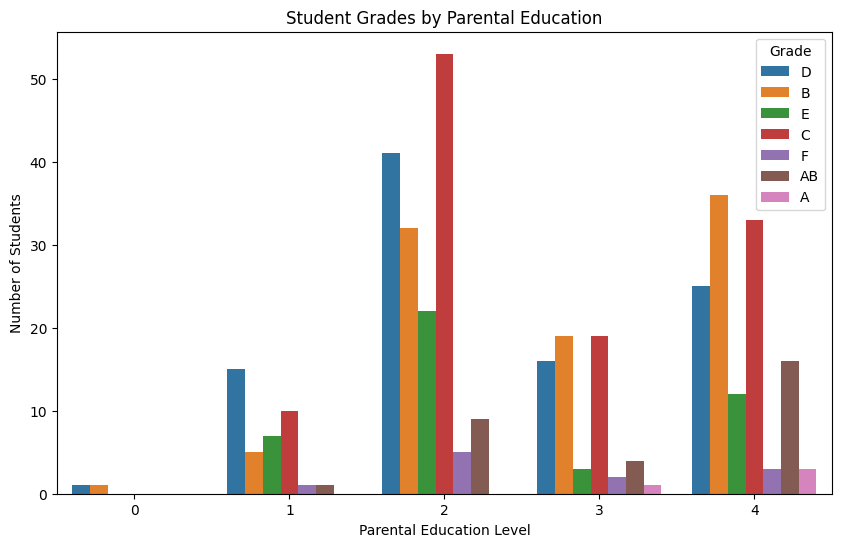

In [115]:


plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Parental_Education', hue='grade')
plt.title('Student Grades by Parental Education')
plt.xlabel('Parental Education Level')
plt.ylabel('Number of Students')
plt.legend(title='Grade')
plt.show()


In summary, the most significant insight is the potential positive correlation between the highest level of parental education (Level 4) and achieving Grade B, which is the highest-performing grade seen in large numbers across the dataset. However, Grades C and D remain very common across all levels.

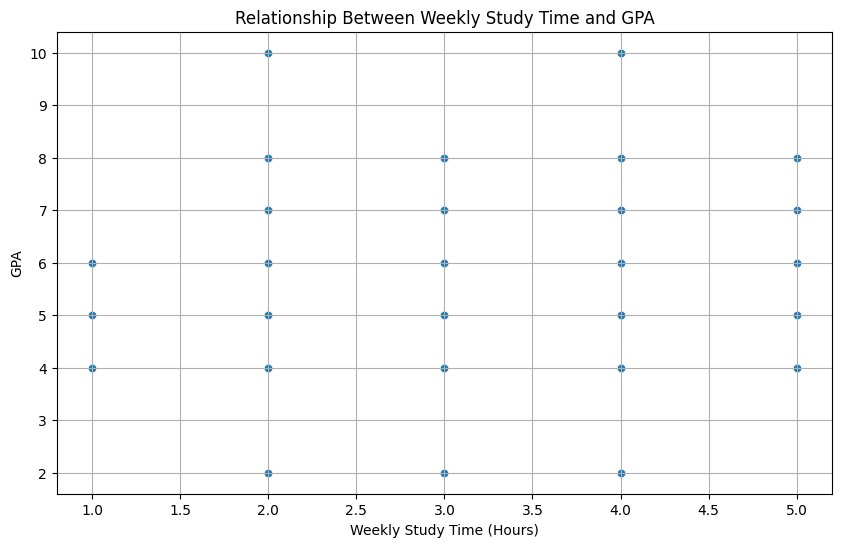

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='studytime', y='GPA')
plt.title('Relationship Between Weekly Study Time and GPA')
plt.xlabel('Weekly Study Time (Hours)')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

In [125]:
pd.crosstab(df['studytime'],df['GPA'],normalize='columns')*100

GPA,2,4,5,6,7,8,10
studytime,,,,,,,
1,54.545455,29.545455,27.551020,23.478261,22.580645,30.000000,50.0
2,36.363636,52.272727,56.122449,53.913043,46.236559,36.666667,0.0
3,9.090909,11.363636,11.224490,16.521739,23.655914,20.000000,25.0
4,0.000000,6.818182,5.102041,6.086957,7.526882,13.333333,25.0


this indicates that students who have 2 GPA -->half of them study only for 2 hours weekly...

none of the student who study for 4 hours get 2 GPA..

overall the distribution is quite uniform

In [128]:
df['famsup'].value_counts()

famsup
yes    242
no     153
Name: count, dtype: int64

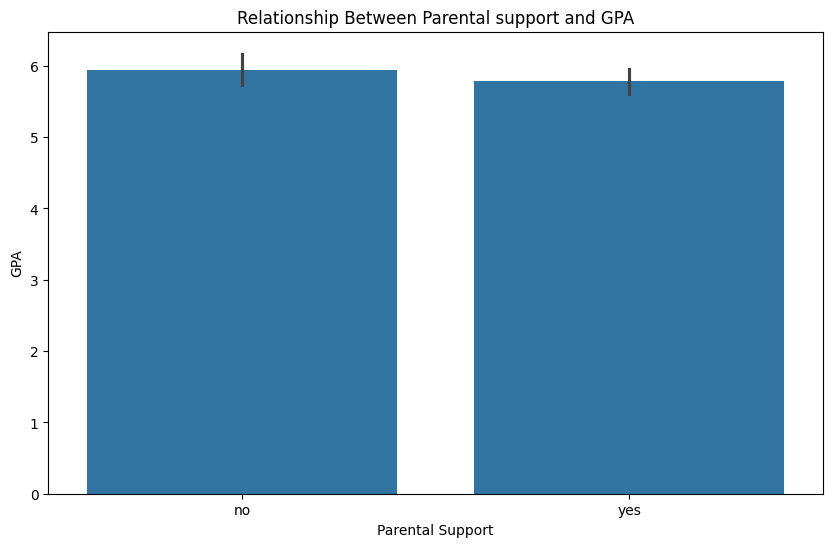

In [132]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='famsup', y='GPA')
plt.title('Relationship Between Parental support and GPA')
plt.xlabel('Parental Support')
plt.ylabel('GPA')
plt.grid(False)
plt.show()

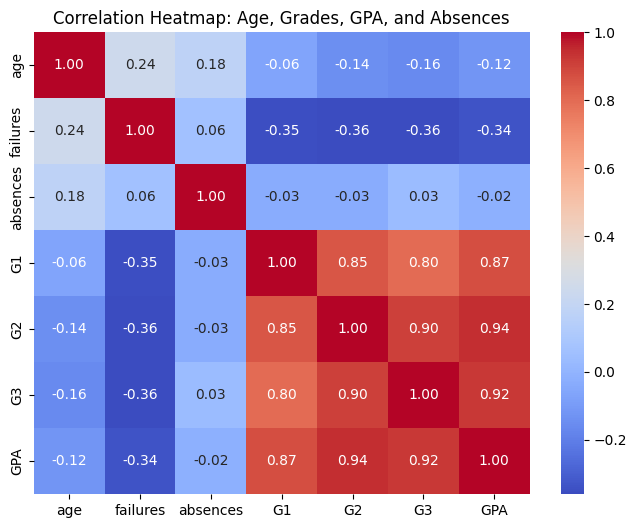

In [143]:
numeric_cols = ['age','failures','absences','G1','G2','G3','GPA']
numeric_df = df[numeric_cols]

corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Age, Grades, GPA, and Absences')
plt.show()

Variable	Correlation with GPA	Interpretation


G1	0.87	Early-term grades strongly predict GPA

G2	0.94	Mid-term grades are the best predictor of GPA

G3	0.92	Final-term grades closely align with GPA

Failures	-0.34	More failures → lower GPA

Absences	-0.02	No major effect on GPA

Age	-0.12	Slight negative correlation

In [144]:
df.to_csv('modified2_table.csv', index=False) 